___
# Importy

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d, CubicSpline, BarycentricInterpolator
from scipy.optimize import curve_fit

___
# Zadanie 1
W zadaniu zaimplementowano interpolację kwadratową metodą Newtona. Obliczono tablicę różnic dzielonych i wyznaczono wzór $f(x) = ax^2 + bx + c$. W SciPy użyto funkcji `interp1d` oraz `polyfit` do wyznaczenia współczynników. Porównano wyniki obu metod, tworząc wykres, na którym funkcje interpolacyjne idealnie się pokryły, co potwierdza ich zgodność.

Wzór funkcji kwadratowej (Newton): f(x) = 0.0037*x^2 + -0.1178*x + 1.2250
Wzór funkcji kwadratowej (SciPy): f(x) = 0.0037*x^2 + -0.1178*x + 1.2250


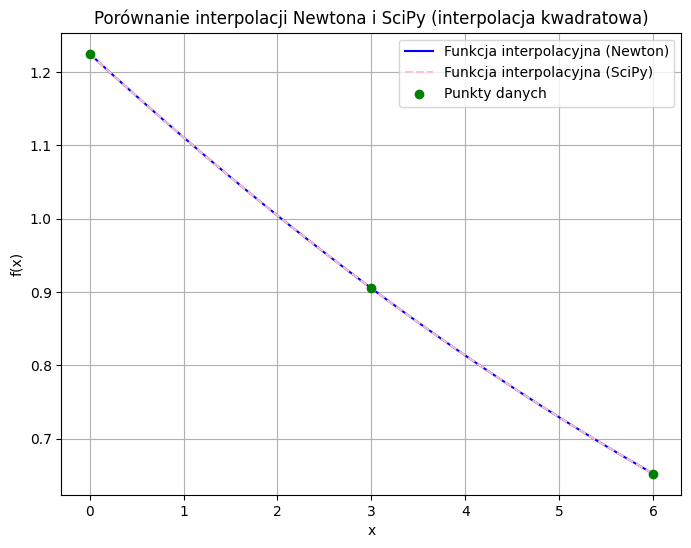

In [2]:
def newton_interpolation(x_vals, y_vals):
    n = len(x_vals)
    diff_table = [[0] * n for _ in range(n)]

    for i in range(n):
        diff_table[i][0] = y_vals[i]

    for j in range(1, n):
        for i in range(n - j):
            diff_table[i][j] = (diff_table[i+1][j-1] - diff_table[i][j-1]) / (x_vals[i+j] - x_vals[i])

    a = diff_table[0][2]  
    b = diff_table[0][1] - a * (x_vals[0] + x_vals[1]) 
    c = diff_table[0][0] - b * x_vals[0] - a * x_vals[0]**2

    formula = f'f(x) = {a:.4f}*x^2 + {b:.4f}*x + {c:.4f}'

    def P(x):
        return a * x**2 + b * x + c

    return P, formula

def scipy_interpolation(x_vals, y_vals):

    f_interp = interp1d(x_vals, y_vals, kind='quadratic')
    coefs = np.polyfit(x_vals, y_vals, 2)
    formula = f'f(x) = {coefs[0]:.4f}*x^2 + {coefs[1]:.4f}*x + {coefs[2]:.4f}'

    return f_interp, formula

x_vals = [0, 3, 6]
y_vals = [1.225, 0.905, 0.652]

P_newton, formula_newton = newton_interpolation(x_vals, y_vals)
f_interp, formula_scipy = scipy_interpolation(x_vals, y_vals)

print('Wzór funkcji kwadratowej (Newton):', formula_newton)
print('Wzór funkcji kwadratowej (SciPy):', formula_scipy)

x_plot = np.linspace(min(x_vals), max(x_vals), 400)
y_plot_newton = P_newton(x_plot)
y_plot_scipy = f_interp(x_plot)

plt.figure(figsize=(8, 6))
plt.plot(x_plot, y_plot_newton, label='Funkcja interpolacyjna (Newton)', color='blue')
plt.plot(x_plot, y_plot_scipy, label='Funkcja interpolacyjna (SciPy)', color='pink', linestyle='--')
plt.scatter(x_vals, y_vals, color='green', zorder=5, label='Punkty danych')
plt.title('Porównanie interpolacji Newtona i SciPy (interpolacja kwadratowa)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()


Otrzymany wzór funkcji to:
$$
f(x) = 0,0037x^2 - 0,1178x + 1,225
$$

___
# Zadanie 2
W zadaniu została użyta funkcja `CubicSpline` z biblioteki SciPy w celu interpolacji naturalnymi funkcjami sklejanymi.


Wartość dla Re = 5:
c_D = -84.02350372537349
Wartość dla Re = 50:
c_D = 436.413792186683
Wartość dla Re = 5000:
c_D = 54738.99116845934


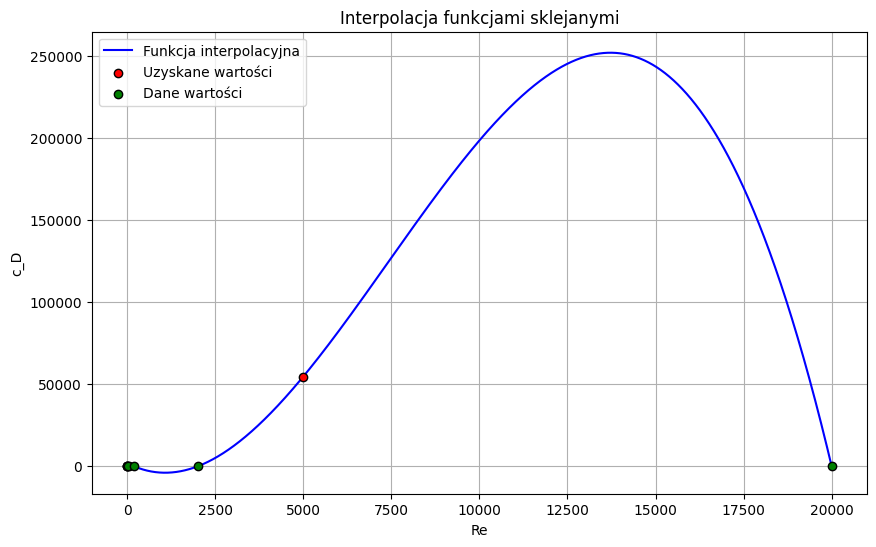

In [3]:
x = [0.2, 2, 20, 200, 2000, 20000]
y = [103, 13.9, 2.72, 0.8, 0.401, 0.433]
Re = [5, 50, 5000]

spline = CubicSpline(x, y)

x_lin = np.linspace(0.2, 20000, 100000)
y_new_spline = spline(x_lin)

results = {r: spline(r) for r in Re}

for r, c in results.items():
    print(f'Wartość dla Re = {r}:\nc_D = {c}')

plt.figure(figsize=(10, 6))
plt.plot(x_lin, y_new_spline, label='Funkcja interpolacyjna', color='blue')
plt.scatter(Re, [results[r] for r in Re], color='red', label='Uzyskane wartości', edgecolors='black', zorder=2)
plt.scatter(x, y, label='Dane wartości', color='green', edgecolors='black', zorder=2)
plt.xlabel('Re')
plt.ylabel('c_D')
plt.title('Interpolacja funkcjami sklejanymi')
plt.legend()
plt.grid(True)
plt.show()


___
# Zadanie 3
W zadaniu zaimplementowano interpolację Newtona. Obliczono tablicę różnic dzielonych, która posłużyła do wyznaczenia wzoru interpolacyjnego $P(x)$. Następnie, dla określonych wartości $Re$, obliczono wyniki interpolacji. Dodatkowo, zastosowano funkcję `BarycentricInterpolator` z biblioteki SciPy, aby porównać wyniki interpolacji.


Wyniki otrzymane metodą interpolacji Newtona:
Re = 5: c_D = -96.1004620718548
Re = 50: c_D = 2581.144117967351
Re = 5000: c_D = 1658455172.0855002

Wyniki otrzymane metodą interpolacji zaimplementowaną w SciPy:
Re = 5: c_D = -96.10046207185488
Re = 50: c_D = 2581.144117967337
Re = 5000: c_D = 1658455170.4186568


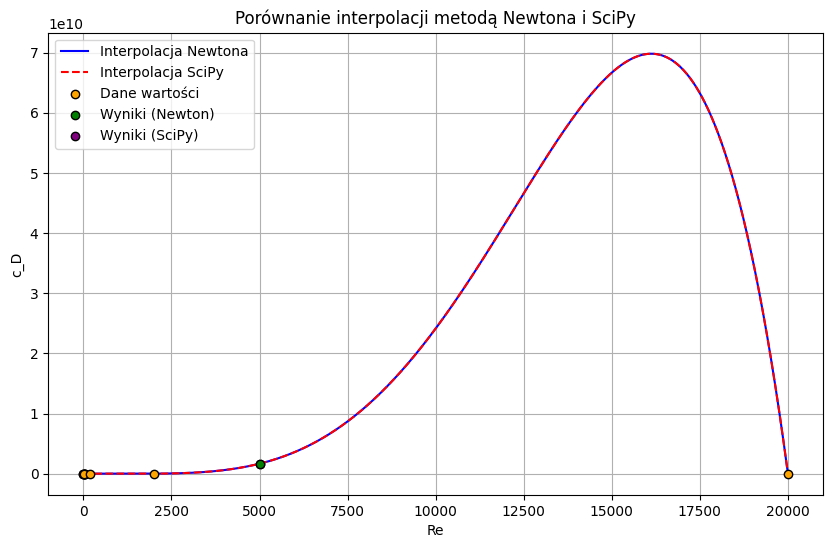

In [4]:
x_vals = [0.2, 2, 20, 200, 2000, 20000]
y_vals = [103, 13.9, 2.72, 0.8, 0.401, 0.433]

def newton_interpolation(x_vals, y_vals):
    n = len(x_vals)
    diff_table = [[0] * n for _ in range(n)]

    for i in range(n):
        diff_table[i][0] = y_vals[i]

    for j in range(1, n):
        for i in range(n - j):
            diff_table[i][j] = (diff_table[i+1][j-1] - diff_table[i][j-1]) / (x_vals[i+j] - x_vals[i])

    def P(x):
        result = diff_table[0][0]
        term = 1
        for j in range(1, n):
            term *= (x - x_vals[j-1])
            result += diff_table[0][j] * term
        return result

    return P

P_newton = newton_interpolation(x_vals, y_vals)


Re = [5, 50, 5000]
results_newton = {r: P_newton(r) for r in Re}
f_scipy = BarycentricInterpolator(x_vals, y_vals)
results_scipy = {r: f_scipy(r) for r in Re}

print('Wyniki otrzymane metodą interpolacji Newtona:')
for r in Re:
    print(f'Re = {r}: c_D = {results_newton[r]}')

print('\nWyniki otrzymane metodą interpolacji zaimplementowaną w SciPy:')
for r in Re:
    print(f'Re = {r}: c_D = {results_scipy[r]}')

x_lin = np.linspace(0.2, 20000, 100000)
y_newton = [P_newton(xi) for xi in x_lin]
y_scipy = f_scipy(x_lin)
plt.figure(figsize=(10, 6))
plt.plot(x_lin, y_newton, label='Interpolacja Newtona', color='blue')
plt.plot(x_lin, y_scipy, label='Interpolacja SciPy', color='red', linestyle='--')
plt.scatter(x_vals, y_vals, color='orange', edgecolors='black', zorder=3, label='Dane wartości')
plt.scatter(Re, [results_newton[r] for r in Re], color='green', edgecolors='black', zorder=2, label='Wyniki (Newton)')
plt.scatter(Re, [results_scipy[r] for r in Re], color='purple', edgecolors='black', zorder=1, label='Wyniki (SciPy)')
plt.xlabel('Re')
plt.ylabel('c_D')
plt.title('Porównanie interpolacji metodą Newtona i SciPy')
plt.legend()
plt.grid(True)

___
# Zadanie 4
Najpierw nakładamy logarytm na funkcję aproksymującą,
    $$
    g(x) = \ln(f) = \ln(ae ^ {bx}) = \ln(a) + bx = c + bx,
    $$
W zadaniu użyto klasycznej regresji liniowej na logarytmowanych danych, w której wyznaczone współczynniki $a$ i $b$ zostały użyte do zbudowania modelu wykładniczego $y = a e^{bx}$. 
W zadaniu użyjemy wzorów:
$$
\begin{align*}
    b = \frac{\sum_{i = 1}^n (X_i - \overline{X})(Y_i - \overline{Y})}{\sum_{i = 1}^n(X_i - b\overline{X})^{2}} 
&&
   c = \overline{Y} - b\overline{X}
\end{align*}
$$
Porównano wyniki rysując wykres, na którym przedstawiono dane oryginalne oraz modele aproksymacyjne. Obliczono również odchylenia standardowe dla obu metod: klasycznej aproksymacji oraz zrealizowanej przy użyciu SciPy.

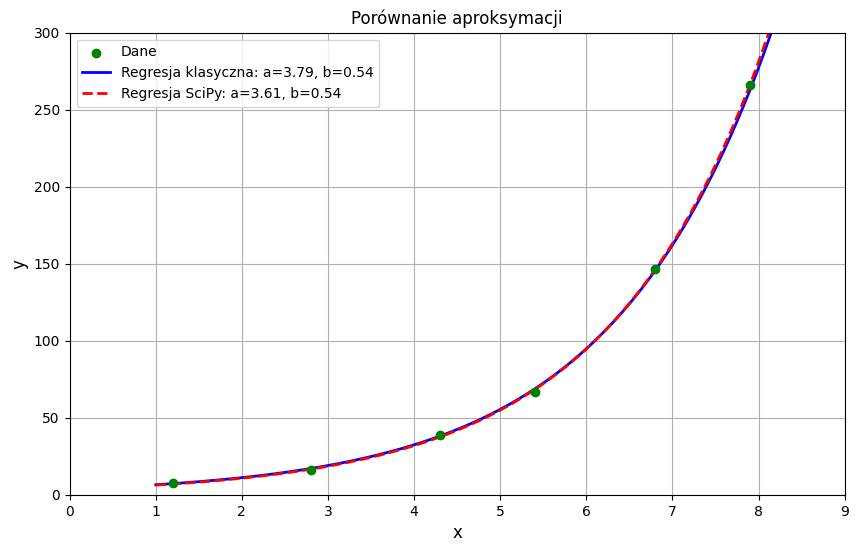

Odchylenie standardowe:
 Klasyczna aproksymacja: 1.6397439579596658
 Aproksymacja zaimplementowana w SciPy: 0.8313228535882667


In [5]:
def linear_regression(x, y):
    b = np.sum((x - np.mean(x)) * (y - np.mean(y))) / np.sum((x - np.mean(x))**2)
    c = np.mean(y) - b * np.mean(x)
    return b, c

def exponential_model(x, a, b):
    return a * np.exp(b * x)

xs = np.array([1.2, 2.8, 4.3, 5.4, 6.8, 7.9])
ys = np.array([7.5, 16.1, 38.9, 67.0, 146.6, 266.2])

ys_log = np.log(ys)
b, c = linear_regression(xs, ys_log)
a = np.exp(c)

def f_approx(x):
    return a * np.exp(b * x)

params, _ = curve_fit(exponential_model, xs, ys)
a_scipy, b_scipy = params

def f_scipy(x): 
    return exponential_model(x, a_scipy, b_scipy)

ys_approx = f_approx(xs)
ys_scipy = f_scipy(xs)

error_approx = ys - ys_approx
error_scipy = ys - ys_scipy
std_approx = np.std(error_approx) 
std_scipy = np.std(error_scipy) 

x_lin = np.linspace(1, 9, 1000)
y_approx = f_approx(x_lin)
y_scipy = f_scipy(x_lin)

plt.figure(figsize=(10, 6))
plt.scatter(xs, ys, color='green', label='Dane', zorder=5)
plt.plot(x_lin, y_approx, label=f'Regresja klasyczna: a={a:.2f}, b={b:.2f}', color='blue', linewidth=2, linestyle='-')
plt.plot(x_lin, y_scipy, label=f'Regresja SciPy: a={a_scipy:.2f}, b={b_scipy:.2f}', color='red', linewidth=2, linestyle='--')
plt.ylim(0, 300)
plt.xlim(0, 9)
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title('Porównanie aproksymacji')
plt.legend(fontsize=10)
plt.grid(True)
plt.show()

print(f'Odchylenie standardowe:\n Klasyczna aproksymacja: {std_approx}\n Aproksymacja zaimplementowana w SciPy: {std_scipy}')



___
# Zadanie 5
W zadaniu zostaną użyte funkcje opisane w liście 2.

In [6]:
def gauss(matrix):
    n = matrix.shape[0]
    for i in range(n):
        max_row = np.argmax(np.abs(matrix[i:, i])) + i

        if max_row != i:
            matrix[[i, max_row]] = matrix[[max_row, i]]

        for j in range(i + 1, n):
            ratio = matrix[j, i] / matrix[i, i]
            matrix[j] -= ratio * matrix[i]
    
    return matrix


def solution(A, b):
    matrix = np.hstack([A, b.reshape(-1, 1)])
    gauss(matrix)
    n = matrix.shape[0]
    x = np.zeros(n)
    
    for i in range(n - 1, -1, -1):
        x[i] = (matrix[i, -1] - np.dot(matrix[i, i + 1:n], x[i + 1:n])) / matrix[i, i]
    
    return x

Zaimplementowano aproksymację wielomianową trzeciego stopnia. Obliczono współczynniki wielomianu przy użyciu macierzy normalnych, gdzie rozwiązaniem układu równań jest zestaw współczynników $a_0, a_1, a_2, a_3$. Wyniki zostały porównane z aproksymacją wykonaną za pomocą funkcji `polyfit` z biblioteki Numpy.

Na koniec wypisano wzór funkcji aproksymującej w postaci $f(x) = a_0 + a_1 x + a_2 x^2 + a_3 x^3$, wyniki obliczeń dla wybranych wartości $x$ oraz przedstawiono funkcję aproksymującą na wykresie.

Funkcja aproksymująca: f(x) = 1.7957089455664152 + -0.039321279744794845 * x + 0.0003285691641953032 * x^2 + -8.458861661547231e-07 * x^3


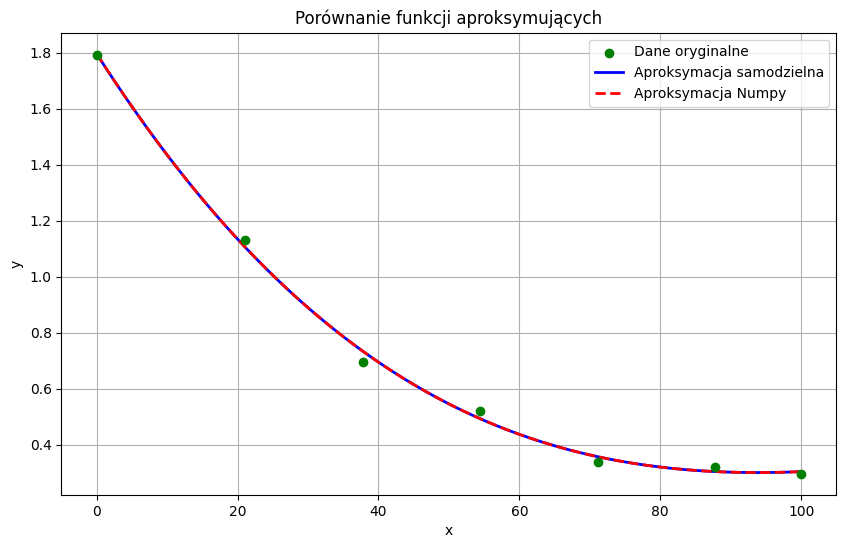

Wynik aproksymacji zaimplementowanej samodzielnie:
T = 10: 1.4345071783718424
T = 30: 0.8889438745121652
T = 60: 0.4365697400923958
T = 90: 0.301552983390042

Wynik aproksymacji zaimplementowanej w Numpy:
T = 10: 1.4345071783718337
T = 30: 0.8889438745121387
T = 60: 0.43656974009240646
T = 90: 0.3015529833900539


In [7]:
def poly_approximation(m, x, y):
    matrix = np.zeros((m + 1, m + 1))
    b = np.zeros(m + 1)

    for i in range(m + 1):
        for j in range(m + 1):
            matrix[i, j] = np.sum(x ** (i + j)) 
        b[i] = np.sum(y * x ** i)  
    coeffs = np.linalg.solve(matrix, b)
    return coeffs

def evaluate(coeffs, x_val):
    result = 0
    for i, coeff in enumerate(coeffs):
        result += coeff * (x_val ** i)  
    return result

def function(coeffs):
    terms = []
    for i, coeff in enumerate(coeffs):
        if coeff != 0:
            if i == 0:
                terms.append(f'{coeff}')
            elif i == 1:
                terms.append(f'{coeff} * x')
            else:
                terms.append(f'{coeff} * x^{i}')
    polynomial = ' + '.join(terms)
    print(f'Funkcja aproksymująca: f(x) = {polynomial}')

x = np.array([0, 21.1, 37.8, 54.4, 71.1, 87.8, 100])
y = np.array([1.79, 1.13, 0.696, 0.519, 0.338, 0.321, 0.296])

poly_coeffs = poly_approximation(3, x, y)

function(poly_coeffs)

x_vals = np.linspace(min(x), max(x), 500)
custom_approx_vals = [evaluate(poly_coeffs, val) for val in x_vals]
poly_approx_numpy = np.poly1d(np.polyfit(x, y, deg=3))
numpy_approx_vals = poly_approx_numpy(x_vals)

plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='green', label='Dane oryginalne', zorder=5)
plt.plot(x_vals, custom_approx_vals, label='Aproksymacja samodzielna', linewidth = 2, color='blue')
plt.plot(x_vals, numpy_approx_vals, label='Aproksymacja Numpy', linewidth = 2, linestyle='--', color='red')

plt.title('Porównanie funkcji aproksymujących')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

x2 = [10, 30, 60, 90]
print('Wynik aproksymacji zaimplementowanej samodzielnie:')
for x_val in x2:
    result = evaluate(poly_coeffs, x_val)
    print(f'T = {x_val}: {result}')

print('\nWynik aproksymacji zaimplementowanej w Numpy:')
for x in x2:
    print(f'T = {x}: {poly_approx_numpy(x)}')


___
# Zadanie 6
W zadaniu porównano dwa podejścia do aproksymacji danych: liniową i kwadratową. W pierwszym podejściu zaimplementowano własną funkcję, która oblicza współczynniki wielomianu przy użyciu macierzy normalnych, a następnie ocenia funkcję aproksymującą na wybranych punktach. W drugim podejściu użyto funkcji `polyfit` z biblioteki Numpy do dopasowania wielomianów. Wyniki obu metod zostały porównane na wykresach, gdzie przedstawiono aproksymacje liniową i kwadratową dla obu podejść.

Dodatkowo, obliczono sumy kwadratów błędów (SSE) dla obu metod i obu rodzajów aproksymacji. Wyniki SSE pozwalają na ocenę jakości dopasowania obu modeli do danych.

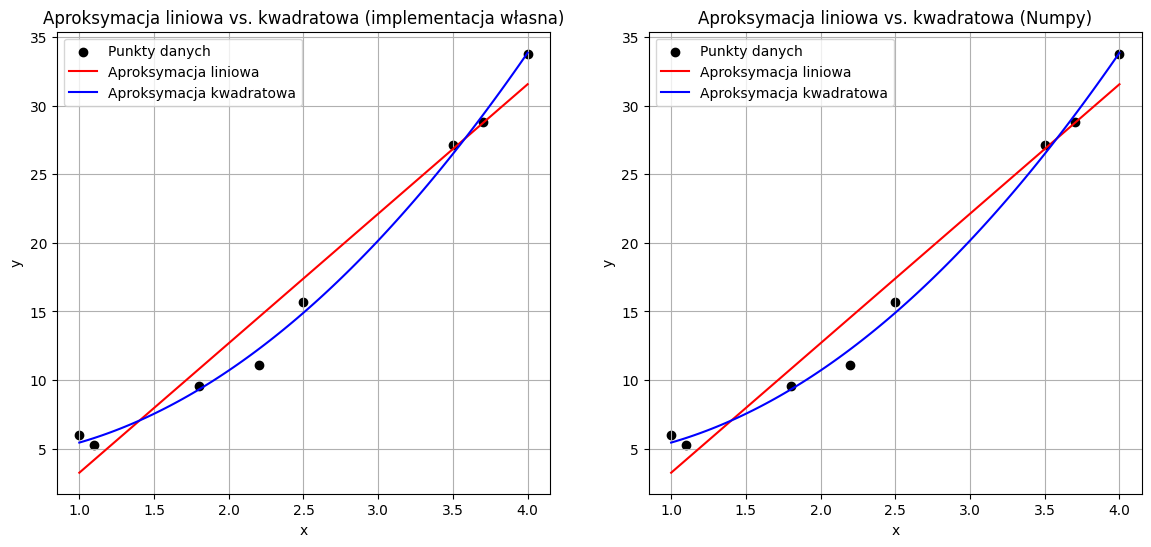

SSE dla samodzielnie zaimplementowanej metody:
Aproksymacja liniowa: 30.20147190079153
Aproksymacja kwadratowa: 3.304259349317636
SSE dla metody zaimplementowanej w Numpy:
Aproksymacja liniowa: 30.201471900791578
Aproksymacja kwadratowa: 3.3042593493176304


In [8]:
x = np.array([1.0, 2.5, 3.5, 4.0, 1.1, 1.8, 2.2, 3.7])
y = np.array([6.008, 15.722, 27.13, 33.772, 5.257, 9.549, 11.098, 28.828])

linear_coeffs = poly_approximation(1, x, y)

quadratic_coeffs = poly_approximation(2, x, y)

x_fit = np.linspace(min(x), max(x), 100)

y_linear_fit = evaluate(linear_coeffs, x_fit)
y_quadratic_fit = evaluate(quadratic_coeffs, x_fit)

linear_coeffs_numpy = np.polyfit(x, y, 1)
quadratic_coeffs_numpy = np.polyfit(x, y, 2)

y_linear_fit_lib = np.polyval(linear_coeffs_numpy, x_fit)
y_quadratic_fit_lib = np.polyval(quadratic_coeffs_numpy, x_fit)

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

ax[0].scatter(x, y, color='black', label='Punkty danych')
ax[0].plot(x_fit, y_linear_fit, color='red', label='Aproksymacja liniowa')
ax[0].plot(x_fit, y_quadratic_fit, color='blue', label='Aproksymacja kwadratowa')
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')
ax[0].set_title('Aproksymacja liniowa vs. kwadratowa (implementacja własna)')
ax[0].legend()
ax[0].grid(True)

ax[1].scatter(x, y, color='black', label='Punkty danych')
ax[1].plot(x_fit, y_linear_fit_lib, color='red', label='Aproksymacja liniowa')
ax[1].plot(x_fit, y_quadratic_fit_lib, color='blue', label='Aproksymacja kwadratowa')
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')
ax[1].set_title('Aproksymacja liniowa vs. kwadratowa (Numpy)')
ax[1].legend()
ax[1].grid(True)

plt.show()

sse_linear = np.sum((y - np.array([evaluate(linear_coeffs, xi) for xi in x])) ** 2)
sse_quadratic = np.sum((y - np.array([evaluate(quadratic_coeffs, xi) for xi in x])) ** 2)

sse_linear_numpy = np.sum((y - np.polyval(linear_coeffs_numpy, x)) ** 2)
sse_quadratic_numpy = np.sum((y - np.polyval(quadratic_coeffs_numpy, x)) ** 2)

print('SSE dla samodzielnie zaimplementowanej metody:')
print(f'Aproksymacja liniowa: {sse_linear}\nAproksymacja kwadratowa: {sse_quadratic}')

print('SSE dla metody zaimplementowanej w Numpy:')
print(f'Aproksymacja liniowa: {sse_linear_numpy}\nAproksymacja kwadratowa: {sse_quadratic_numpy}')

Analizując otrzymane wyniki, możemy dojść do wniosku, że lepsza jest aproksymacja kwadratowa.